In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sdf = pd.read_csv("Store-info.csv")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
sdf.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [5]:
sdf.tail()

,shop_id,shop_area_sq_ft,shop_profile
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN
123,SHOP070,676,NaN


In [6]:
sdf.shop_id.nunique()

124

<Axes: >

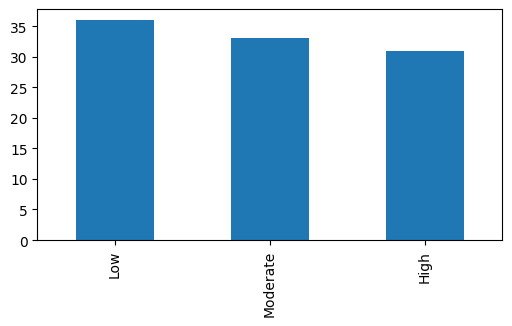

In [7]:
plt.figure(figsize=(6,3))
sdf.shop_profile.value_counts().plot.bar()

In [11]:
hdf = pd.read_csv('Historical-transaction-data_itemdes_imputed_with_price.csv')

In [12]:
hdf.item_description.isnull().sum()

0

In [13]:
# hdf['item_description'] = hdf['item_description'].fillna('Unknown')

In [14]:
hdf.shape

(473974, 7)

In [15]:
hdf.item_description.nunique()

116

In [16]:
hdf.item_description.nunique()

116

In [17]:
hdf.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [18]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473974 entries, 0 to 473973
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  473974 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 25.3+ MB


In [19]:
# hdf.transaction_date.value_counts().sort_index()

In [20]:
hdf['tot_sales_amount'] = hdf['item_price'] * hdf['quantity_sold']
hdf.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,tot_sales_amount
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,440
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,440
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,320
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,300
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,1050


In [21]:
hdf_grouped = hdf.groupby(['shop_id', 'item_description'])['quantity_sold'].sum().reset_index()
hdf_grouped.head()

,shop_id,item_description,quantity_sold
0,SHOP001,130,31
1,SHOP001,140,92
2,SHOP001,195,13
3,SHOP001,210,25
4,SHOP001,280,40


In [22]:
hdf_pivot = hdf_grouped.pivot_table(index=['shop_id'], columns='item_description', 
                                    values='quantity_sold', aggfunc='sum', fill_value=0)
hdf_pivot = hdf_pivot.reset_index()
hdf_pivot.head()

item_description,shop_id,1040,1050,1105,1120,1170,1190,120,1235,1260,130,1300,1330,1365,140,1400,1430,1470,1495,1540,1560,1610,1625,1680,1750,1820,1890,195,1950,1960,2015,2030,210,2100,2145,2170,2240,2275,2380,2450,2535,2590,260,2665,2730,2795,280,2800,2940,325,3360,3430,350,3500,390,420,4200,455,490,4900,4970,5040,520,560,585,60,630,65,650,6500,70,700,715,770,780,840,845,910,975,980,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP001,0,0,0,0,0,0,0,0,0,31,0,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,18,0,0,33,0,0,0,0,0,73,10,0,0,0,0,35,0,0,81,0,0,0,0,0,0,0,0,0,63,220,0,367,29,151,96,24,36,65,50,83,108,56,552,203,45,96,43,12,84,19,56,0,194,12,15,201,53,20,27,99,135,97,29,130,21
1,SHOP002,0,0,0,0,0,0,0,0,0,69,0,0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,29,60,0,0,0,0,0,0,0,0,0,41,0,0,0,94,0,0,6,0,0,53,0,7,32,0,6,14,0,0,0,0,7,0,0,0,58,43,0,207,84,0,0,12,11,0,0,15,0,121,380,0,1102,64,794,167,91,66,122,129,129,151,152,1198,224,37,158,48,49,224,44,100,0,725,18,67,388,182,25,64,277,366,453,53,330,53
2,SHOP003,0,0,0,0,0,0,2,20,0,15,0,0,0,132,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,87,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,32,0,7,32,0,8,8,0,0,0,0,9,0,0,0,24,0,0,109,0,0,0,0,0,0,14,0,15,143,356,0,643,100,515,221,41,106,64,113,116,180,140,735,277,44,136,78,38,247,13,102,0,331,19,30,280,103,10,48,226,283,273,82,279,33
3,SHOP004,0,0,0,0,0,0,0,0,0,50,0,0,0,120,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,47,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,6,0,0,6,0,13,0,0,0,0,0,0,0,0,0,0,0,0,52,0,0,86,0,0,0,0,0,0,0,0,0,74,169,0,559,59,364,96,49,47,92,112,208,181,212,974,508,37,120,81,38,113,39,52,0,237,18,43,302,97,19,63,233,296,179,97,185,49
4,SHOP005,0,0,0,0,18,0,0,0,0,154,0,0,0,263,0,0,0,0,0,0,0,0,24,0,0,0,45,0,0,0,0,112,0,0,0,0,0,0,0,0,0,23,0,43,0,62,0,0,6,0,0,22,0,7,25,0,0,0,0,0,0,8,8,0,0,0,103,20,0,181,63,0,0,12,0,0,0,0,0,119,217,4,566,49,424,164,67,121,108,83,131,322,154,873,456,65,166,97,26,214,38,103,0,476,25,35,222,128,15,50,227,187,242,122,233,56


In [23]:
# hdf_pivot = hdf.pivot_table(index=['transaction_date', 'invoice_id', 'customer_id', 'shop_id', 'item_price'],
#                              columns='item_description', values='quantity_sold', aggfunc='sum', fill_value=0)
# hdf_pivot = hdf_pivot.reset_index()
# hdf_pivot.head()

In [24]:
hdf.transaction_date.min(), hdf.transaction_date.max()

('2021-10-15T00:00:00.000Z', '2021-12-15T00:00:00.000Z')

In [25]:
hdf[hdf['shop_id']=="SHOP019"].transaction_date.min(), hdf[hdf['shop_id']=="SHOP019"].transaction_date.max()

('2021-10-15T00:00:00.000Z', '2021-12-15T00:00:00.000Z')

In [26]:
hdf[hdf['shop_id']=="SHOP076"].transaction_date.min(), hdf[hdf['shop_id']=="SHOP076"].transaction_date.max()

('2021-10-15T00:00:00.000Z', '2021-12-15T00:00:00.000Z')

In [27]:
hdf_total_sold = hdf.groupby('shop_id').agg({'quantity_sold': 'count', 'tot_sales_amount': 'sum', 'customer_id': 'nunique',
                                            'invoice_id': 'nunique', 'transaction_date': 'nunique', 'item_description': 'nunique'})

hdf_total_sold.head()

,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,item_description
shop_id,,,,,,
SHOP001,2020,1485285,1118,1537,62,46
SHOP002,4800,3084455,2577,3769,62,56
SHOP003,3659,1922995,2064,2867,62,52
SHOP004,3459,1571700,1744,2641,62,45
SHOP005,4201,2148520,2203,3183,62,56


In [28]:
hdf_total_sold.transaction_date.value_counts()

62    120
6       1
55      1
61      1
60      1
Name: transaction_date, dtype: int64

In [29]:
# pd.merge(sdf, hdf_total_sold, on='shop_id', how='left')

In [30]:
df = pd.merge(sdf, hdf_total_sold, on='shop_id', how='left')
df.sort_values(by='customer_id', ascending=False)

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,item_description
65,SHOP043,676,High,6631,3106960,3501,4986,62,57
27,SHOP011,617,High,6359,3550120,3186,4854,62,54
55,SHOP086,661,High,6016,2697370,3164,4536,62,53
30,SHOP016,1077,High,5837,3734470,3091,4477,62,54
16,SHOP062,495,High,5343,2157105,3081,4075,62,51
75,SHOP082,549,High,6048,2694095,3007,4444,62,50
28,SHOP077,852,High,5665,2733130,2997,4259,62,51
76,SHOP111,617,High,6027,3606120,2959,4531,62,54
17,SHOP084,617,Low,5913,2927550,2892,4502,62,50
122,SHOP056,597,NaN,5762,3023805,2832,4320,62,55


In [31]:
hdf_pivot.head(1)

item_description,shop_id,1040,1050,1105,1120,1170,1190,120,1235,1260,130,1300,1330,1365,140,1400,1430,1470,1495,1540,1560,1610,1625,1680,1750,1820,1890,195,1950,1960,2015,2030,210,2100,2145,2170,2240,2275,2380,2450,2535,2590,260,2665,2730,2795,280,2800,2940,325,3360,3430,350,3500,390,420,4200,455,490,4900,4970,5040,520,560,585,60,630,65,650,6500,70,700,715,770,780,840,845,910,975,980,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
0,SHOP001,0,0,0,0,0,0,0,0,0,31,0,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,18,0,0,33,0,0,0,0,0,73,10,0,0,0,0,35,0,0,81,0,0,0,0,0,0,0,0,0,63,220,0,367,29,151,96,24,36,65,50,83,108,56,552,203,45,96,43,12,84,19,56,0,194,12,15,201,53,20,27,99,135,97,29,130,21


In [32]:
# hdf_pivot = hdf_pivot.drop(columns=['customer_id','transaction_date','customer_id'])

In [33]:
df1 = pd.merge(df, hdf_pivot, on='shop_id', how='left')

In [34]:
df1.sort_values(by='customer_id', ascending=False).head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,item_description,1040,1050,1105,1120,1170,1190,120,1235,1260,130,1300,1330,1365,140,1400,1430,1470,1495,1540,1560,1610,1625,1680,1750,1820,1890,195,1950,1960,2015,2030,210,2100,2145,2170,2240,2275,2380,2450,2535,2590,260,2665,2730,2795,280,2800,2940,325,3360,3430,350,3500,390,420,4200,455,490,4900,4970,5040,520,560,585,60,630,65,650,6500,70,700,715,770,780,840,845,910,975,980,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
65,SHOP043,676,High,6631,3106960,3501,4986,62,57,0,0,0,33,0,17,0,0,0,90,0,0,0,541,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0,287,0,0,31,0,0,0,36,0,0,52,0,0,0,248,0,0,17,0,0,130,0,25,92,0,15,20,0,0,0,0,27,0,0,38,109,0,0,560,20,0,0,0,12,0,0,0,0,247,345,0,765,52,935,156,231,141,106,133,142,326,191,1339,461,64,336,153,42,247,25,130,0,405,21,95,415,194,35,110,428,544,588,58,520,64
27,SHOP011,617,High,6359,3550120,3186,4854,62,54,0,31,0,0,0,0,0,0,0,44,0,0,0,222,21,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,53,0,0,0,0,0,0,0,0,0,10,0,0,0,78,0,0,0,0,0,17,0,6,26,0,0,8,0,0,0,0,8,0,0,0,46,0,0,213,11,0,11,0,25,0,13,0,0,219,516,0,1025,58,901,201,301,107,177,126,206,321,274,1337,214,38,298,97,41,310,18,209,0,469,19,85,524,201,45,88,410,761,734,137,577,70
55,SHOP086,661,High,6016,2697370,3164,4536,62,53,0,0,0,0,0,0,0,0,0,47,0,0,0,174,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,128,0,0,0,0,0,0,0,0,0,35,0,0,0,99,0,0,6,0,0,33,0,7,27,0,7,0,0,0,0,0,17,0,0,0,55,10,0,185,31,0,11,0,0,13,0,0,0,179,450,0,696,115,598,191,179,151,166,132,232,338,194,1068,1000,94,212,110,64,241,41,130,0,339,41,51,436,176,27,110,495,505,555,82,545,52
30,SHOP016,1077,High,5837,3734470,3091,4477,62,54,0,0,0,0,0,0,0,0,0,55,0,0,0,55,21,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,32,0,0,0,0,0,0,0,0,0,23,0,0,0,73,0,0,6,0,0,10,0,14,35,0,0,8,0,0,0,0,17,0,0,0,41,0,0,98,0,0,0,13,0,0,0,16,15,147,384,0,493,76,505,168,490,112,120,94,140,370,306,898,628,105,246,109,24,226,39,122,21,251,21,45,282,87,22,60,777,946,957,123,1548,33
16,SHOP062,495,High,5343,2157105,3081,4075,62,51,0,0,0,0,0,0,0,0,0,61,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,170,0,0,0,0,0,0,0,0,0,30,0,0,0,104,0,0,11,0,0,31,0,7,40,0,0,8,0,0,0,0,9,0,0,0,45,11,0,381,11,0,0,0,0,0,0,0,0,343,502,0,512,86,833,256,126,174,287,142,314,361,468,750,453,64,288,94,42,112,28,197,0,263,41,130,275,81,24,103,149,264,135,153,232,56


In [35]:
df1.transaction_date.value_counts()

62    120
60      1
55      1
6       1
61      1
Name: transaction_date, dtype: int64

In [36]:
df1[df1.transaction_date < 62]

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,item_description,1040,1050,1105,1120,1170,1190,120,1235,1260,130,1300,1330,1365,140,1400,1430,1470,1495,1540,1560,1610,1625,1680,1750,1820,1890,195,1950,1960,2015,2030,210,2100,2145,2170,2240,2275,2380,2450,2535,2590,260,2665,2730,2795,280,2800,2940,325,3360,3430,350,3500,390,420,4200,455,490,4900,4970,5040,520,560,585,60,630,65,650,6500,70,700,715,770,780,840,845,910,975,980,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L
24,SHOP120,517,Low,2254,1272710,1204,1779,60,45,0,0,0,0,0,0,0,0,0,39,0,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,34,0,0,0,0,0,0,0,0,0,23,0,0,0,32,0,0,0,0,0,5,0,0,13,0,0,0,0,0,0,0,0,0,0,0,51,0,0,103,0,0,0,0,0,0,0,0,0,61,197,0,470,30,290,71,28,55,58,63,75,96,105,432,180,12,112,40,11,65,13,25,0,245,13,42,181,91,22,68,124,295,120,57,184,20
48,SHOP055,720,Moderate,2462,931695,1370,1915,55,43,0,0,0,0,0,0,0,0,0,0,0,0,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,49,0,0,0,0,0,15,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,32,0,0,0,0,0,0,0,0,42,142,22,342,60,283,107,23,31,83,53,73,126,105,653,286,20,101,32,23,136,13,48,0,167,23,25,124,85,15,28,126,117,105,118,124,20
51,SHOP008,678,Moderate,272,131245,189,203,6,36,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,18,25,4,43,7,43,31,0,7,6,5,7,12,2,79,37,0,9,5,1,18,0,11,0,18,2,2,7,5,0,4,14,20,8,8,21,0
79,SHOP112,668,Moderate,2468,1223905,1308,1819,61,48,0,0,0,0,0,0,0,0,0,65,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,33,0,0,0,0,0,0,0,0,0,9,0,0,0,18,0,0,6,0,0,0,0,7,13,0,0,0,0,0,0,9,0,0,0,0,47,0,0,55,0,0,12,0,0,0,0,0,0,53,236,0,328,43,374,115,52,45,59,69,64,211,108,532,436,30,105,97,19,137,19,45,0,139,10,29,99,78,8,36,135,178,118,82,145,29


In [38]:
check = input("Yes Checked ?")
if check=='s':
    df1.to_csv('modified_data_v7_item_imputed_price.csv', index=False)

Yes Checked ?s


In [39]:
hdf.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,tot_sales_amount
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,440
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,440
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,320
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,300
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,1050


In [40]:
hdf_copy = hdf.copy()
hdf_copy.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,tot_sales_amount
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,440
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,440
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,320
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,300
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,1050


In [41]:
hdf_copy['transaction_date'] = pd.to_datetime(hdf_copy['transaction_date'])

# Create a new column week using the week number of the year
hdf_copy['week'] = hdf_copy['transaction_date'].dt.week

# Group the data by shop_id and week and sum the quantity_sold column
weekly_sales = hdf_copy.groupby(['shop_id', 'week'])['quantity_sold'].sum().reset_index()

# # Create a new dataframe with the unique shop_id values
# unique_shops = pd.DataFrame(hdf_copy['shop_id'].unique(), columns=['shop_id'])

# # For each shop_id, create a new column with the weekly sales values
# for i, row in unique_shops.iterrows():
#     shop_id = row['shop_id']
#     weekly_sales_shop = weekly_sales[weekly_sales['shop_id'] == shop_id]
#     weekly_sales_shop = weekly_sales_shop.set_index('week')
#     unique_shops.loc[i, 'weekly_sales'] = weekly_sales_shop['quantity_sold']

# # Display the resulting dataframe
# print(unique_shops)

C:\Users\vipoo\AppData\Local\Temp\ipykernel_11524\3422933985.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  hdf_copy['week'] = hdf_copy['transaction_date'].dt.week


In [42]:
weekly_sales.head()

,shop_id,week,quantity_sold
0,SHOP001,41,214
1,SHOP001,42,458
2,SHOP001,43,431
3,SHOP001,44,305
4,SHOP001,45,301


In [43]:
weekly_sales_pivot = weekly_sales.pivot_table(index=['shop_id'], columns='week', 
                                    values='quantity_sold', aggfunc='sum', fill_value=0)
weekly_sales_pivot = weekly_sales_pivot.reset_index()
weekly_sales_pivot.head()

week,shop_id,41,42,43,44,45,46,47,48,49,50
0,SHOP001,214,458,431,305,301,333,356,584,644,316
1,SHOP002,416,1224,924,607,871,786,1237,1394,1719,390
2,SHOP003,356,972,706,523,584,714,836,891,1037,340
3,SHOP004,501,768,534,589,430,623,724,818,982,432
4,SHOP005,431,1081,1047,795,699,708,729,932,1048,314


In [44]:
df2 = pd.merge(df1, weekly_sales_pivot, on='shop_id', how='left')

In [45]:
df2.head()

,shop_id,shop_area_sq_ft,shop_profile,quantity_sold,tot_sales_amount,customer_id,invoice_id,transaction_date,item_description,1040,1050,1105,1120,1170,1190,120,1235,1260,130,1300,1330,1365,140,1400,1430,1470,1495,1540,1560,1610,1625,1680,1750,1820,1890,195,1950,1960,2015,2030,210,2100,2145,2170,2240,2275,2380,2450,2535,2590,260,2665,2730,2795,280,2800,2940,325,3360,3430,350,3500,390,420,4200,455,490,4900,4970,5040,520,560,585,60,630,65,650,6500,70,700,715,770,780,840,845,910,975,980,BOTTLED DRINKING WATER 1.5L,BOTTLED DRINKING WATER 500ML,CHOCOLATE MILK 180ML,CREAM SODA 1.5L,CREAM SODA 1L,CREAM SODA 500ML,CREAM SODA APPLE POP 1L,DRY GINGER ALE PET 500ML,FIT O MANGO 1L,FIT O MANGO 200ML,FIT O MIXED FRUIT 1L,FIT O MIXED FRUIT 200ML,FIT O ORANGE 1L,FIT O ORANGE 200ML,GINGER BEER 1.5L,GINGER BEER 1L,GINGER BEER 400ML,GINGER BEER 500ML,GINGER BEER SUGAR FREE 500ML,KIK COLA 1L,LEMONADE 1.5L,LEMONADE 1L,LEMONADE 500ML,LIME CRUSH JUICE 1L,NECTO 1.5L,NECTO 1L,NECTO 500ML,ORANGE BARLEY 1.5L,ORANGE CRUSH 1.5L,ORANGE CRUSH 1L,ORANGE CRUSH 500ML,SODA 1L,SODA 500ML,SODA PET 1.5L,STRAWBERRY MILK 180ML,TONIC PET 500ML,TWISTEE APPLE 1L,41,42,43,44,45,46,47,48,49,50
0,SHOP047,528,Moderate,1692,842960,928,1302,62,49,0,0,0,0,0,0,0,0,0,45,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,28,0,0,0,0,0,0,0,0,0,16,0,0,0,38,0,0,0,0,0,36,0,7,33,0,0,8,0,0,0,9,0,0,0,0,29,0,0,67,0,0,0,0,0,0,0,0,15,42,124,0,249,28,278,71,8,66,87,31,44,66,137,306,189,51,84,26,7,41,19,31,0,102,6,25,113,59,47,39,88,60,126,52,116,30,169,508,426,304,374,305,322,345,416,119
1,SHOP009,676,High,4589,1970870,2498,3493,62,52,0,0,0,17,0,18,0,0,0,88,0,0,0,402,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,179,0,0,0,0,0,0,0,0,0,15,0,0,0,117,0,0,6,0,0,12,0,0,21,0,8,0,0,0,0,8,25,0,0,0,59,0,0,290,21,0,0,0,0,0,0,0,0,123,427,0,686,62,451,203,56,76,102,115,182,208,223,1018,552,69,254,96,30,194,15,113,0,338,24,79,333,175,17,109,145,219,144,67,135,51,440,1184,834,756,662,672,949,1175,1269,470
2,SHOP083,676,Low,3614,1691985,1900,2718,62,48,0,0,0,0,0,0,0,0,0,38,0,0,0,207,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,79,0,0,0,0,0,0,0,0,0,24,0,0,0,93,0,0,0,0,0,22,0,0,25,0,0,0,0,0,0,0,9,0,0,0,38,0,0,180,11,0,0,0,0,0,0,0,0,81,256,3,592,76,408,186,67,93,89,95,92,211,172,734,559,29,122,67,43,168,15,63,0,286,29,40,359,134,27,55,151,162,160,109,117,48,309,1000,670,538,662,630,733,823,900,379
3,SHOP117,676,Low,4074,2325980,2037,3158,62,49,0,0,0,16,0,0,0,0,0,37,0,0,0,167,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,119,0,0,0,0,0,0,0,0,0,15,0,0,0,56,0,0,0,0,0,5,0,0,19,0,0,0,0,0,0,0,26,0,0,9,41,12,0,159,0,0,0,0,0,0,0,0,0,116,152,0,565,58,343,318,155,115,166,110,188,216,150,797,468,56,81,85,72,182,30,57,0,402,10,45,339,82,49,58,449,418,513,98,390,43,478,975,744,710,796,657,956,1050,1136,571
4,SHOP042,676,Low,3272,1340215,1841,2495,62,47,0,0,0,0,0,0,0,0,0,33,0,0,0,194,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,123,0,0,0,0,0,0,0,0,0,9,0,0,0,64,0,0,0,0,0,28,0,0,7,0,0,8,0,0,0,0,18,0,0,0,36,0,0,175,0,0,0,0,0,0,0,0,0,91,228,0,478,40,385,138,74,98,66,67,53,183,142,666,467,47,147,68,25,131,34,57,0,178,7,26,265,77,18,46,143,211,165,125,140,48,357,766,594,479,537,528,598,856,837,292


In [46]:
df2.item_description.value_counts()

50    15
48    12
51    12
49    10
52    10
54     9
53     8
47     6
58     6
46     6
56     5
43     4
44     4
55     4
59     3
57     2
45     2
61     2
36     1
60     1
64     1
42     1
Name: item_description, dtype: int64

In [47]:
df2.shape

(124, 135)

In [49]:
check = input("Yes Checked ?")
if check=='s':
    df2.to_csv('modified_data_v7_item_imputed_price_v2_weekly.csv', index=False)

Yes Checked ?s


In [50]:
# hdf.transaction_date.dtype

In [44]:
# hdf['transaction_date'] = pd.to_datetime(hdf['transaction_date'])

In [45]:
# hdf.head(2)

In [46]:
# np.where(((hdf['transaction_date'] >= pd.to_datetime('2021-10-15')) & 
#           (hdf['transaction_date'] <= pd.to_datetime('2021-11-15'))), 0, 1)

In [47]:
# mask = ((hdf['transaction_date'] >= pd.Timestamp('2021-10-15T00:00:00.000Z')) & 
#         (hdf['transaction_date'] <= pd.Timestamp('2021-11-15T00:00:00.000Z')))

# # create a new column with 1 or 2 based on the mask
# hdf['month'] = pd.Series([1 if m else 2 for m in mask])

In [48]:
# hdf.head()